# Use Case 1: Prepare a nice figure for the paper

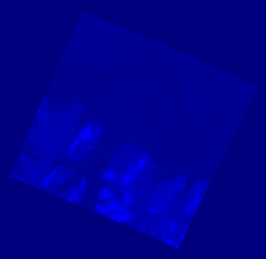

In [1]:
# Needed in IPython notebook only
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# get location of nansat test data
import os, nansat
idir = os.path.join(os.path.dirname(nansat.__file__), 'tests', 'data/')

# import all tools from the NANSAT package
from nansat import *

# open file with satelite data
n = Nansat(idir+'gcps.tif')

# define grid for the region of interest
d = Domain('+proj=longlat', '-te 27 70.3 31 71.6 -tr 0.015 0.005')

# change grid of our satellite data (reproject and resample)
n.reproject(d, 2)

# write image of one band into a PNG file
n.write_figure('usecase1a.png')

# display generated PNG in IPython
Image(filename='usecase1a.png')

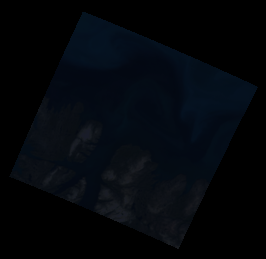

In [2]:
# write RGB image of 3 bands into a PNG file
n.write_figure('usecase1b.png', bands=[1,2,3])

Image(filename='usecase1b.png')

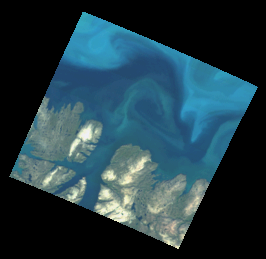

In [3]:
# write RGB image and apply histogram-strech
n.write_figure('usecase1c.png', bands=[1,2,3], clim='hist')
Image(filename='usecase1c.png')

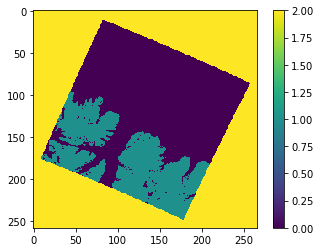

In [4]:
# mask away unwanted data

# get data from the first band
b1 = n[1]

# create array for the mask with zeros only
mask_array = np.zeros(b1.shape)

# in the mask, change values to 1 where brightness is above 17 (land)
mask_array[b1 > 17] = 1   # mask land

# in the mask, change values to 2 where brightness is above 0 (out of swath)
mask_array[b1 == 0] = 2 # mask black corners

# show mask
plt.imshow(mask_array);plt.colorbar()
plt.show()

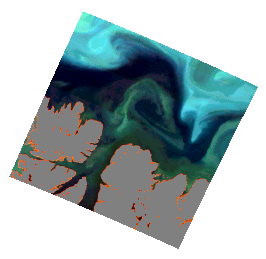

In [5]:
# define re-coloring in a look-up-table (LUT)
# LUT is a dictionray:
#     key   - pixel value in the mask
#     value - RGB code for the result
mask_lut = {1 : [128,128,128],
            2 : [255,255,255]}

# write RGB and use the mask to change color of the black corners and land
n.write_figure('usecase1d.png',
               bands=[1,2,3],
               clim='hist',
               mask_array=mask_array,
               mask_lut=mask_lut)
Image(filename='usecase1d.png')